<a href="https://colab.research.google.com/github/ZKisielewska/learning-git-task/blob/master/M_10_2_Descriptive_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Perform a statistical analysis (calculation of the average, quartiles or boxplots) for the Fare (fee) variable.

In [ ]:
# data manipulation
import numpy as np
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# statistical data analysis
from scipy import stats

# data processing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
dataset = pd.read_csv('https://uploads.kodilla.com/bootcamp/ds/10/titanic.csv')
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
sns.set_style('darkgrid')

In [ ]:
# assigning a value to a variable 'fare_values'
fare_values = dataset.loc[dataset['Fare'].notnull(), 'Fare'].values
print(fare_values.shape)

(891,)


In [ ]:
pd.crosstab(dataset.Fare, dataset.Pclass).sum()

Pclass
1    216
2    184
3    491
dtype: int64

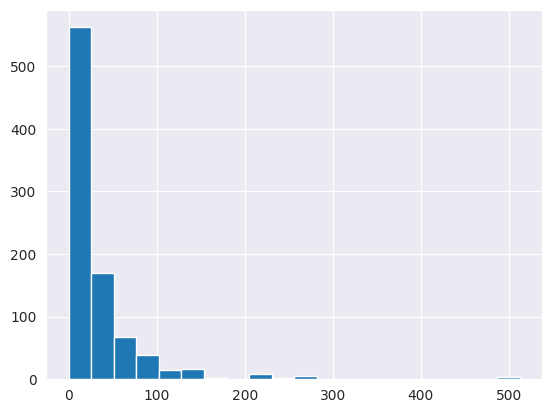

In [ ]:
plt.hist(fare_values, bins=20)
plt.show()

We can see that a significant group of passengers paid the lowest fares.

In [ ]:
# count the mean fare
mean_fare = np.round(np.mean(fare_values))
mean_fare

32.0

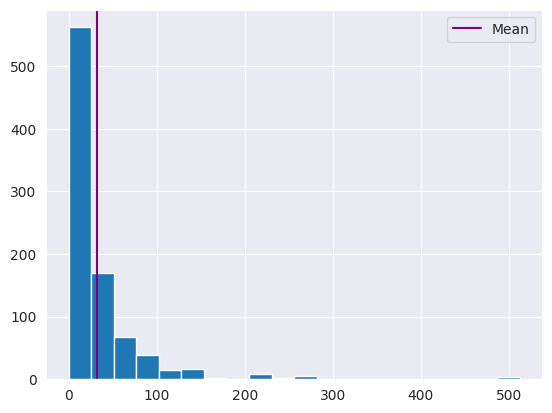

In [ ]:
plt.hist(fare_values, bins=20)
plt.axvline(x = mean_fare, color = 'purple', label = 'Mean')
plt.legend(loc='upper right')
plt.show()

In [ ]:
# count median value
median_fare = np.median(fare_values)
median_fare

14.4542

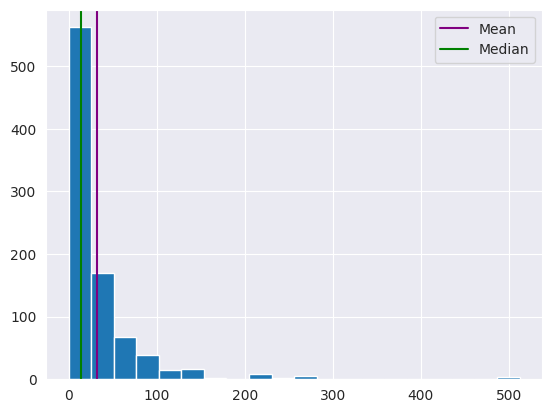

In [ ]:
plt.hist(fare_values, bins=20)
plt.axvline(x = mean_fare, color='purple', label = 'Mean')
plt.axvline(x = median_fare, color='green', label = 'Median')
plt.legend(loc='upper right')
plt.show()

In [ ]:
# count mode value
mode_fare = stats.mode(fare_values)
mode_fare

<ipython-input-44-035d6d2f8783>:2: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_fare = stats.mode(fare_values)


ModeResult(mode=array([8.05]), count=array([43]))

We can see that the lowest fare was $ 8.05 and that price paid 43 travellers.

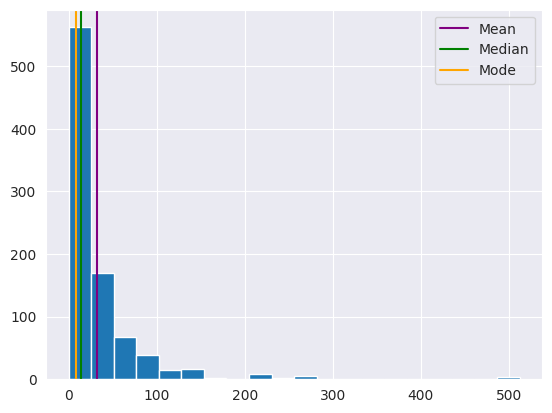

In [ ]:
plt.hist(fare_values, bins=20)
plt.axvline(x = mean_fare, color='purple', label = 'Mean')
plt.axvline(x = median_fare, color='green', label = 'Median')
plt.axvline(x = mode_fare[0], color='orange', label = 'Mode')
plt.legend(loc='upper right')
plt.show()

In [ ]:
# count quantiles
q0 = np.quantile(fare_values, 0.0)
q1 = np.round(np.quantile(fare_values, 0.25))
q3 = np.round(np.quantile(fare_values, 0.75))
q4 = np.round(np.quantile(fare_values, 1.0))
print(f'Q0: {q0}')
print(f'Q1: {q1}')
print(f'Q2: {median_fare}')
print(f'Q3: {q3}')
print(f'Q4: {q4}')

Q0: 0.0
Q1: 8.0
Q2: 14.4542
Q3: 31.0
Q4: 512.0


We can see there were travellers who did not pay for the fare.

The highest fare was 512 dollars. There was 75 % travellers who paid 31 dollars for the fare and 25% who pay 8 dollars.

In [ ]:
# count the range variable
range_fare = max(fare_values) - min(fare_values)
range_fare

512.3292

In the data set, the data range is 512 dollars.

In [ ]:
# count IQR
iqr = q3 - q1
iqr

23.0

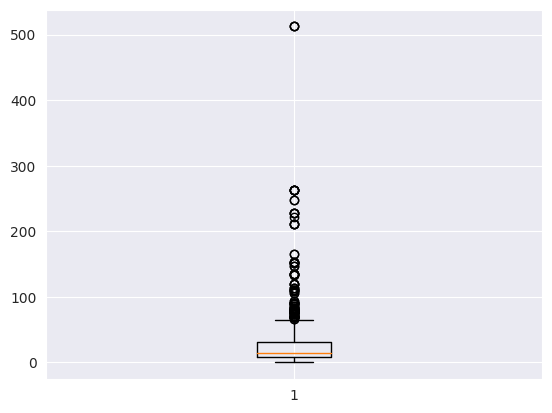

In [ ]:
plt.boxplot(fare_values)
plt.show()

We can see there are outliers for the highest fare, this indicates that at this point in the distribution the values are rare, there are few of them.

In [ ]:
# count variance
variance_fare = np.var(fare_values, ddof=1)
variance_fare

2469.436845743116

In [ ]:
# count standard deviation
print(variance_fare**(1/2))

49.6934285971809


In [ ]:
standard_deviation_fare = np.std(fare_values, ddof=1)
standard_deviation_fare

49.6934285971809

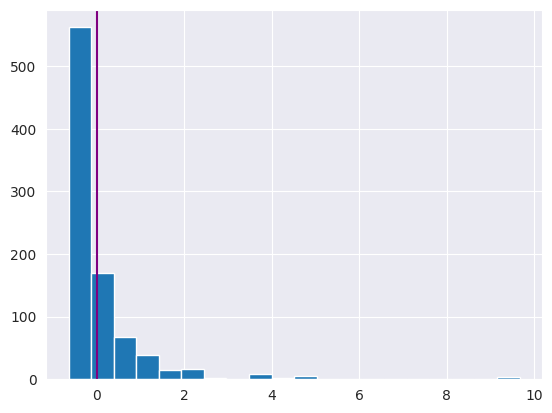

Mean: 3.987332972840069e-18
Standard deviation: 1.0005616400330457


In [ ]:
# data standardization - StandardScalar
scalar_standardized = StandardScaler()
standardized_fare_values = scalar_standardized.fit_transform(fare_values.reshape(-1, 1))
plt.hist(standardized_fare_values, bins=20)
plt.axvline(x = standardized_fare_values.mean(), color = 'purple')
plt.show()
print(f'Mean: {standardized_fare_values.mean()}')
print(f'Standard deviation: {np.std(standardized_fare_values, ddof=1)}')

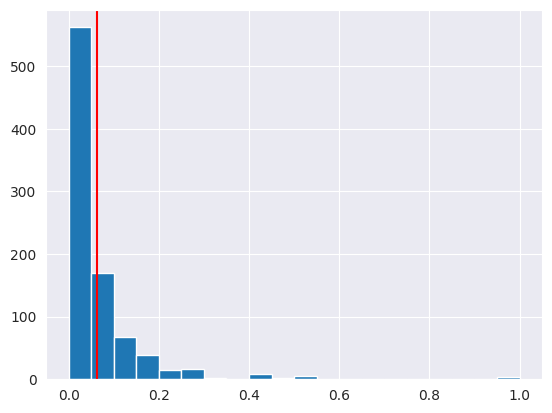

Mean: 0.06285842768394742
Standard deviation: 0.09699511290236998


In [ ]:
# data standardization - MinMaxScalar
scaler_MinMax = MinMaxScaler()
normalized_fare_values = scaler_MinMax.fit_transform(fare_values.reshape(-1, 1))
plt.hist(normalized_fare_values, bins=20)
plt.axvline(x = normalized_fare_values.mean(), color='red', label = 'Średnia')
plt.show()
print(f'Mean: {normalized_fare_values.mean()}')
print(f'Standard deviation: {np.std(normalized_fare_values, ddof=1)}')

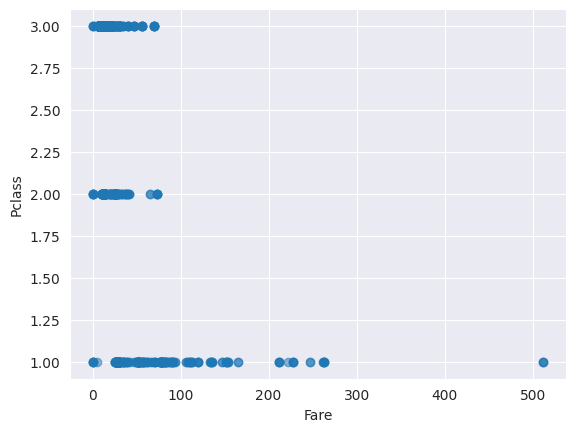

In [ ]:
# examine the correlation between 'Pclass' and 'Fare' variables
pclass_values = dataset.loc[dataset['Pclass'].notnull(), 'Pclass'].values
plt.scatter(x=fare_values, y=pclass_values, alpha=0.5)
plt.xlabel('Fare')
plt.ylabel('Pclass')
plt.show()

The lower the cabin class, the cheaper the fare. An outlier is an amount for a trip that exceeds $500

In [ ]:
# Pearson correlation
stats.pearsonr(fare_values, pclass_values)

PearsonRResult(statistic=-0.5494996199439078, pvalue=1.967386173422602e-71)

We see a negative correlation, as the price for the trip increases, the cabin class number changes.

In this case, the p value is very low, so we can reject the randomness hypothesis and conclude that this correlation is not a coincidence.